# Building Intuition for Fourier Series

In [1]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In Fourier analysis, we are seeking to express a periodic function $f(x)=f(x+L)$ in terms of the sum of a sine and cosine functions, i.e.,

$f(x) = \frac{A_0}{2} + A_1 \cos\left( \frac{2 \pi x}{L} \right) + A_2 \cos\left( \frac{4 \pi x}{L} \right) + A_3 \cos\left( \frac{6 \pi x}{L} \right) + \cdots + B_1 \sin\left( \frac{2 \pi x}{L} \right) + B_2 \sin\left( \frac{4 \pi x}{L} \right) + B_3 \sin\left( \frac{6 \pi x}{L} \right) + \cdots$

Or more compactly,

$f(x) = \frac{A_0}{2} + \sum_{n=1}^\infty \left[A_n \cos\left( \frac{2 \pi n x}{L} \right)+ B_n \sin\left( \frac{2 \pi n x}{L} \right) \right]$

The mission is to find out what the coefficients $A_n$ and $B_n$ are. From the trick that we learned in lecture, we know that

$ A_n = \frac{2}{L} \int_0^L f(x) \cos \left( \frac{2 \pi n x}{L} \right) dx$

and

$ B_n = \frac{2}{L} \int_0^L f(x) \sin \left( \frac{2 \pi n x}{L} \right) dx$.

These integrals are sometimes called "overlap integrals". In this particular example, they measure the degree of overlap between the function $f(x)$ and the sines and cosines. Intuitively, the larger the overlap between $f(x)$ and some sine or cosine, the more we need this particular sine or cosine in order to reconstruct the function, and the greater its coefficient. Getting some intuition for the overlap integral allows one to immediately identify coefficients that are zero.

A recipe for figuring out which coefficients (if any) of a Fourier Series are zero:
1. Does the $f(x)$ have an average of zero? If so, $A_0=0$.
2. Is $f(x)$ even (i.e., reflection symmetric about the vertical axis)? If so, all the $B_n=0$.
3. Is $f(x)$ odd (i.e., antisymmetric or rotationally symmetric by 180 degrees about the origin)? If so, all the $A_n = 0$.
4. Do the overlap integrals suggest that some of the coefficients are zero?

## Worked Example with the Triangle Wave Function

Suppose we had a triangle wave function with a period of $L=2$:

In [2]:
def funct(x):
    modx = x % 2.
    fx = np.zeros_like(modx)
    for i,x in enumerate(modx):
        if x <= 1.:
            fx[i] = 1.-2.*x
        else:
            fx[i] = 2.*x-3.
    return fx

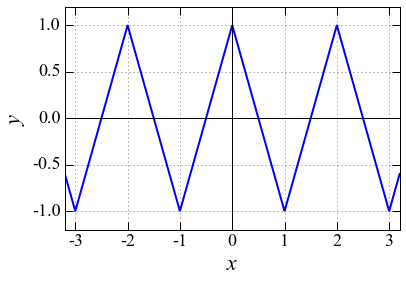

In [6]:
xmin = -3.2
xmax = 3.2
x = np.linspace(xmin,xmax,1000)
f, ax = plt.subplots(figsize=(6,4))
ax.plot(x,funct(x),lw=2,c='blue')
ax.set_xlim(xmin,xmax)
ax.set_ylim(-1.2,1.2)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.grid(True)

This function has an average of zero, so we can immediatedly say that $A_0=0$. Moreover, it is an even function, so we know that $B_n=0$. In other words, we will be building this function out of cosines and not sines.

Consider $A_1 = \int_0^2 f(x) \cos (\pi x) dx$. In words, this integral says to multiply our triangle wave and the cosine and to integrate (add up) the resulting area. Graphically, this looks like (zooming into the region $0<x<2$ that we're integrating over):

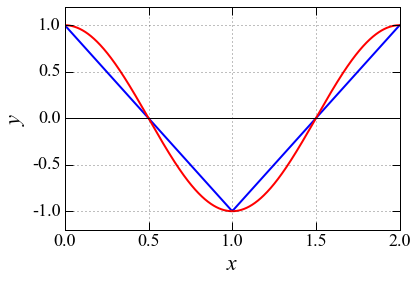

In [8]:
x = np.linspace(0.,2.,1000)
f, ax = plt.subplots(figsize=(6,4))
ax.plot(x,funct(x),lw=2,c='blue')
ax.plot(x,np.cos(np.pi * x),lw=2,c='red')
ax.set_xlim(0.,2.)
ax.set_ylim(-1.2,1.2)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.axhline(0, color='black')
ax.grid(True)

We see that our triange wave $f(x)$ and $\cos(\pi x)$ are rather similar. We say that they have a very high overlap. One can see that integrating their product will give a positive number, because the blue and red curves always have the same sign, so their product is positive across the entire range. Plotting the product, we have:

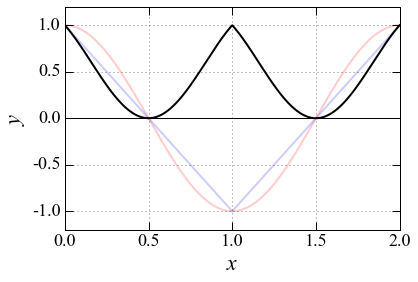

In [19]:
x = np.linspace(0.,2.,1000)
f, ax = plt.subplots(figsize=(6,4))
ax.plot(x,funct(x),lw=2,c='blue',alpha=0.2)
ax.plot(x,np.cos(np.pi * x),lw=2,c='red',alpha=0.2)
ax.plot(x,funct(x)*np.cos(np.pi * x),lw=2,c='black')
ax.set_xlim(0.,2.)
ax.set_ylim(-1.2,1.2)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.axhline(0, color='black')
ax.grid(True)

The integral must therefore also be positive. It turns out to be $A_1 = 8 / \pi^2 \approx 0.81$.

Now consider $A_2 = \int_0^2 f(x) \cos (2 \pi x) dx$:

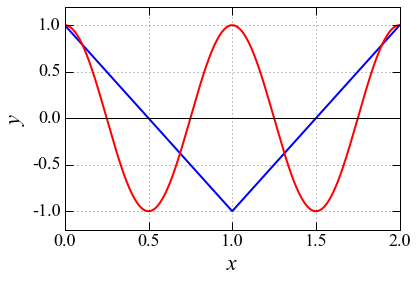

In [10]:
x = np.linspace(0.,2.,1000)
f, ax = plt.subplots(figsize=(6,4))
ax.plot(x,funct(x),lw=2,c='blue')
ax.plot(x,np.cos(2.* np.pi * x),lw=2,c='red')
ax.set_xlim(0.,2.)
ax.set_ylim(-1.2,1.2)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.axhline(0, color='black')
ax.grid(True)

This time the overlap is not so good---in fact, it integrates to zero over the whole range. To see this, notice that if I flip the sign of the blue curve from $x=0.5$ to $x=1.0$, then the integrated overlap from $0 < x < 0.5$ is the same as the integrated overlap from $0.5 < x < 1.0$. But that was if I flipped the sign, so it follows that in the original scenario, the overlap integral from $0.5 < x < 1.0$ has the same size as the overlap integral from $0 < x < 0.5$, BUT with the opposite sign. Integrating from $x=0$ to $x=1$ thus gives me no net overlap, and the same is true from $x=1$ to $x=2$. We can make this even clearer by just plotting the product of the two functions:

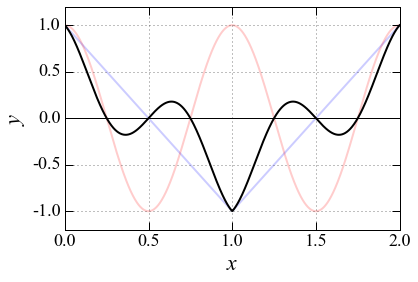

In [15]:
x = np.linspace(0.,2.,1000)
f, ax = plt.subplots(figsize=(6,4))
ax.plot(x,funct(x),lw=2,c='blue',alpha=0.2)
ax.plot(x,np.cos(2.* np.pi * x),lw=2,c='red',alpha=0.2)
ax.plot(x,funct(x)*np.cos(2.* np.pi * x),lw=2,c='black')
ax.set_xlim(0.,2.)
ax.set_ylim(-1.2,1.2)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.axhline(0, color='black')
ax.grid(True)

One sees that as we integrate this black curve from $x=0$ to $x=0.5$, we get a positive number (since the positive portions have a greater area than the negative portions). But this positive number is precisely canceled out by the negative number that one obtains by integrating from $x=0.5$ to $x=1.0$. The cycle repeats itself from $x=1.0$ to $x=2.0$. We therefore conclude that $A_2 =0$.

Let's keep going and do $A_3 = \int_0^2 f(x) \cos (3 \pi x) dx$:

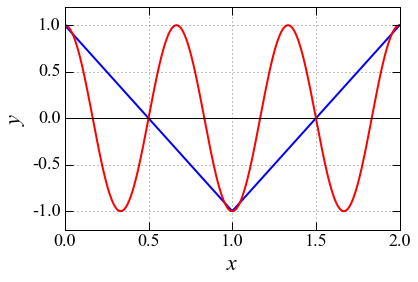

In [16]:
x = np.linspace(0.,2.,1000)
f, ax = plt.subplots(figsize=(6,4))
ax.plot(x,funct(x),lw=2,c='blue')
ax.plot(x,np.cos(3.* np.pi * x),lw=2,c='red')
ax.set_xlim(0.,2.)
ax.set_ylim(-1.2,1.2)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.axhline(0, color='black')
ax.grid(True)

The logic here has some similarity to the reasoning we used for $A_1$. Notice that the $0 < x <0.5$ region is very similar to the $0.5 < x < 1.0$. In fact, the two overlap integrals in the two regions is identical, because the second region is like the first region but with the signs of both curves flipped. Since we care about their product---which doesn't change sign if both functions change sign---the overlap integral is the same in the two regions. Plotting the product, we get:

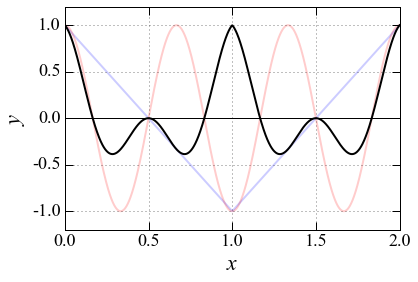

In [20]:
x = np.linspace(0.,2.,1000)
f, ax = plt.subplots(figsize=(6,4))
ax.plot(x,funct(x),lw=2,c='blue',alpha=0.2)
ax.plot(x,np.cos(3.* np.pi * x),lw=2,c='red',alpha=0.2)
ax.plot(x,funct(x)*np.cos(3.* np.pi * x),lw=2,c='black')
ax.set_xlim(0.,2.)
ax.set_ylim(-1.2,1.2)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.axhline(0, color='black')
ax.grid(True)

Integrating over this black curve, one obtains $A_3 = 8 / (9 \pi^2)$. This is a smaller number than what we got for $A_1$, because notice that the overlap isn't always positive here. There's more positive overlap than negative overlap, but the negative stuff does cancel things out a little bit.

We can continue to play the same game to conclude that $A_4=0$:

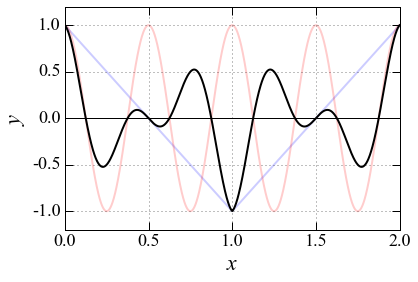

In [21]:
x = np.linspace(0.,2.,1000)
f, ax = plt.subplots(figsize=(6,4))
ax.plot(x,funct(x),lw=2,c='blue',alpha=0.2)
ax.plot(x,np.cos(4.* np.pi * x),lw=2,c='red',alpha=0.2)
ax.plot(x,funct(x)*np.cos(4.* np.pi * x),lw=2,c='black')
ax.set_xlim(0.,2.)
ax.set_ylim(-1.2,1.2)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.axhline(0, color='black')
ax.grid(True)

And that with $A_5$ there should be even more cancellation than with $A_3$, so that even though it's non-zero, it should be smaller than $A_3$:

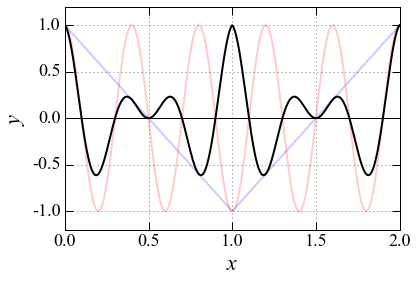

In [22]:
x = np.linspace(0.,2.,1000)
f, ax = plt.subplots(figsize=(6,4))
ax.plot(x,funct(x),lw=2,c='blue',alpha=0.2)
ax.plot(x,np.cos(5.* np.pi * x),lw=2,c='red',alpha=0.2)
ax.plot(x,funct(x)*np.cos(5.* np.pi * x),lw=2,c='black')
ax.set_xlim(0.,2.)
ax.set_ylim(-1.2,1.2)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.axhline(0, color='black')
ax.grid(True)

In [31]:
def funct2(x):
    modx = x % 2.
    fx = np.zeros_like(modx)
    for i,x in enumerate(modx):
        if x <= 0.5 or x >1.5:
            fx[i] = -1.
        else:
            fx[i] = 1.
    return fx

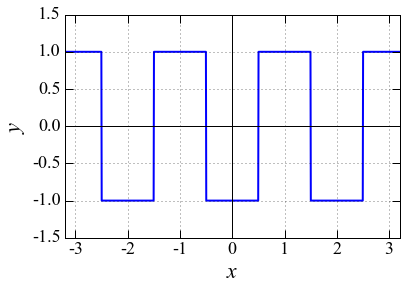

In [32]:
xmin = -3.2
xmax = 3.2
x = np.linspace(xmin,xmax,1000)
f, ax = plt.subplots(figsize=(6,4))
ax.plot(x,funct2(x),lw=2,c='blue')
ax.set_xlim(xmin,xmax)
ax.set_ylim(-1.5,1.5)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.grid(True)

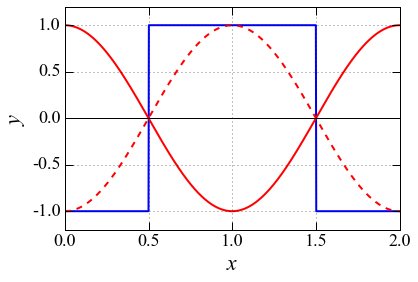

In [43]:
x = np.linspace(0.,2.2,1000)
f, ax = plt.subplots(figsize=(6,4))
ax.plot(x,funct2(x),lw=2,c='blue')
ax.plot(x,np.cos(np.pi * x),lw=2,c='red')
ax.plot(x,-np.cos(np.pi * x),lw=2,c='red',ls="--")
ax.set_xlim(0.,2.)
ax.set_ylim(-1.2,1.2)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.axhline(0, color='black')
ax.grid(True)

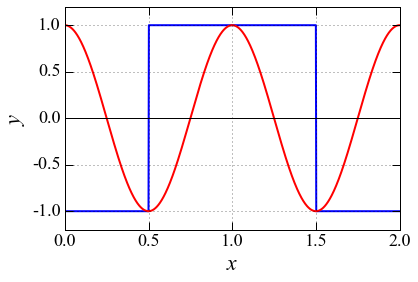

In [44]:
x = np.linspace(0.,2.2,1000)
f, ax = plt.subplots(figsize=(6,4))
ax.plot(x,funct2(x),lw=2,c='blue')
ax.plot(x,np.cos(2 * np.pi * x),lw=2,c='red')
# ax.plot(x,-np.cos(np.pi * x),lw=2,c='red',ls="--")
ax.set_xlim(0.,2.)
ax.set_ylim(-1.2,1.2)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.axhline(0, color='black')
ax.grid(True)

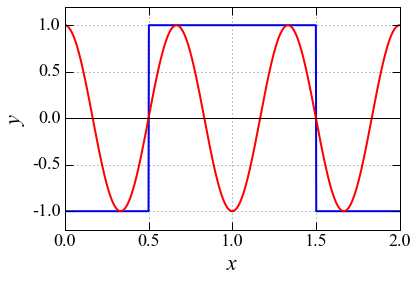

In [45]:
x = np.linspace(0.,2.2,1000)
f, ax = plt.subplots(figsize=(6,4))
ax.plot(x,funct2(x),lw=2,c='blue')
ax.plot(x,np.cos(3 * np.pi * x),lw=2,c='red')
# ax.plot(x,-np.cos(np.pi * x),lw=2,c='red',ls="--")
ax.set_xlim(0.,2.)
ax.set_ylim(-1.2,1.2)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.axhline(0, color='black')
ax.grid(True)

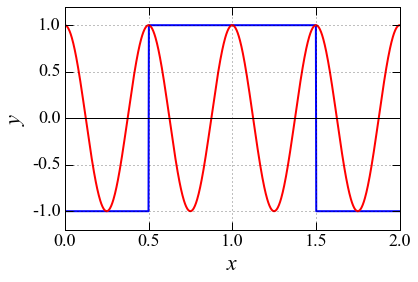

In [46]:
x = np.linspace(0.,2.2,1000)
f, ax = plt.subplots(figsize=(6,4))
ax.plot(x,funct2(x),lw=2,c='blue')
ax.plot(x,np.cos(4 * np.pi * x),lw=2,c='red')
# ax.plot(x,-np.cos(np.pi * x),lw=2,c='red',ls="--")
ax.set_xlim(0.,2.)
ax.set_ylim(-1.2,1.2)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.axhline(0, color='black')
ax.grid(True)

In [34]:
def funct3(x):
    modx = x % 2.
    fx = np.zeros_like(modx)
    for i,x in enumerate(modx):
        if x <= 1.:
            fx[i] = x
        else:
            fx[i] = x - 2.
    return fx

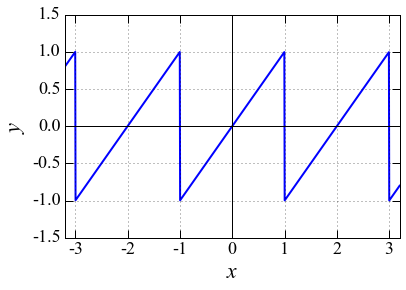

In [35]:
xmin = -3.2
xmax = 3.2
x = np.linspace(xmin,xmax,1000)
f, ax = plt.subplots(figsize=(6,4))
ax.plot(x,funct3(x),lw=2,c='blue')
ax.set_xlim(xmin,xmax)
ax.set_ylim(-1.5,1.5)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.grid(True)

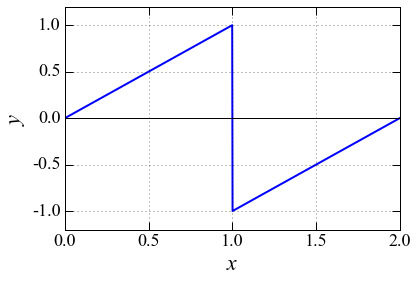

In [36]:
x = np.linspace(0.,2.2,1000)
f, ax = plt.subplots(figsize=(6,4))
ax.plot(x,funct3(x),lw=2,c='blue')
# ax.plot(x,np.cos(np.pi * x),lw=2,c='red')
ax.set_xlim(0.,2.)
ax.set_ylim(-1.2,1.2)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.axhline(0, color='black')
ax.grid(True)

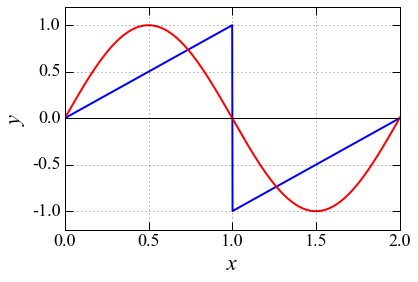

In [48]:
x = np.linspace(0.,2.2,1000)
f, ax = plt.subplots(figsize=(6,4))
ax.plot(x,funct3(x),lw=2,c='blue')
ax.plot(x,np.sin(np.pi * x),lw=2,c='red')
# ax.plot(x,-np.cos(np.pi * x),lw=2,c='red',ls="--")
ax.set_xlim(0.,2.)
ax.set_ylim(-1.2,1.2)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.axhline(0, color='black')
ax.grid(True)

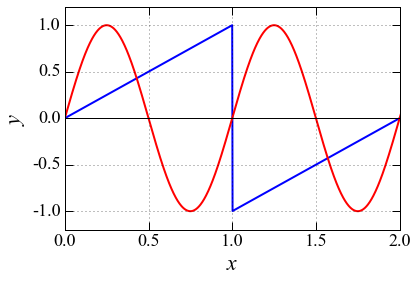

In [49]:
x = np.linspace(0.,2.2,1000)
f, ax = plt.subplots(figsize=(6,4))
ax.plot(x,funct3(x),lw=2,c='blue')
ax.plot(x,np.sin(2*np.pi * x),lw=2,c='red')
# ax.plot(x,-np.cos(np.pi * x),lw=2,c='red',ls="--")
ax.set_xlim(0.,2.)
ax.set_ylim(-1.2,1.2)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.axhline(0, color='black')
ax.grid(True)

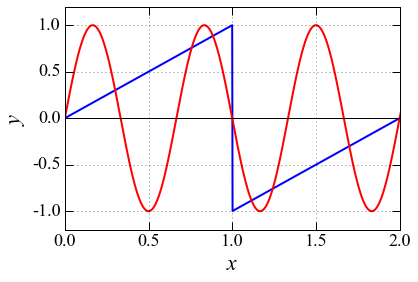

In [50]:
x = np.linspace(0.,2.2,1000)
f, ax = plt.subplots(figsize=(6,4))
ax.plot(x,funct3(x),lw=2,c='blue')
ax.plot(x,np.sin(3*np.pi * x),lw=2,c='red')
# ax.plot(x,-np.cos(np.pi * x),lw=2,c='red',ls="--")
ax.set_xlim(0.,2.)
ax.set_ylim(-1.2,1.2)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.axhline(0, color='black')
ax.grid(True)

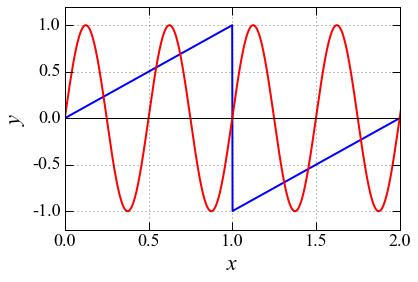

In [51]:
x = np.linspace(0.,2.2,1000)
f, ax = plt.subplots(figsize=(6,4))
ax.plot(x,funct3(x),lw=2,c='blue')
ax.plot(x,np.sin(4*np.pi * x),lw=2,c='red')
# ax.plot(x,-np.cos(np.pi * x),lw=2,c='red',ls="--")
ax.set_xlim(0.,2.)
ax.set_ylim(-1.2,1.2)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.axhline(0, color='black')
ax.grid(True)